In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os

## for 1v1d

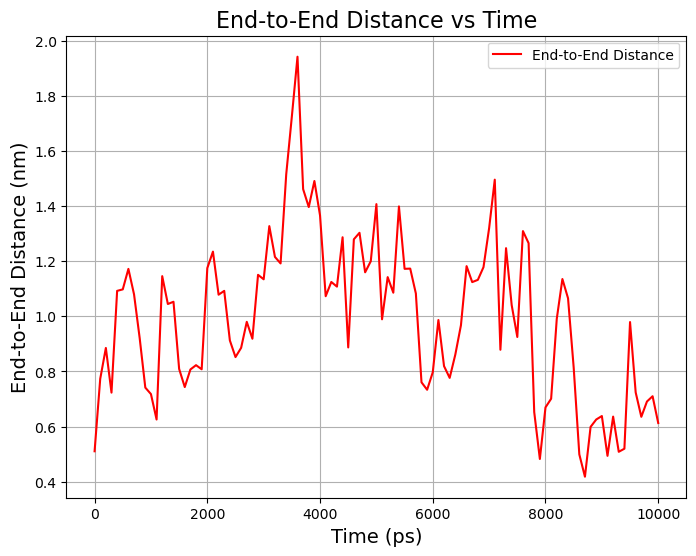

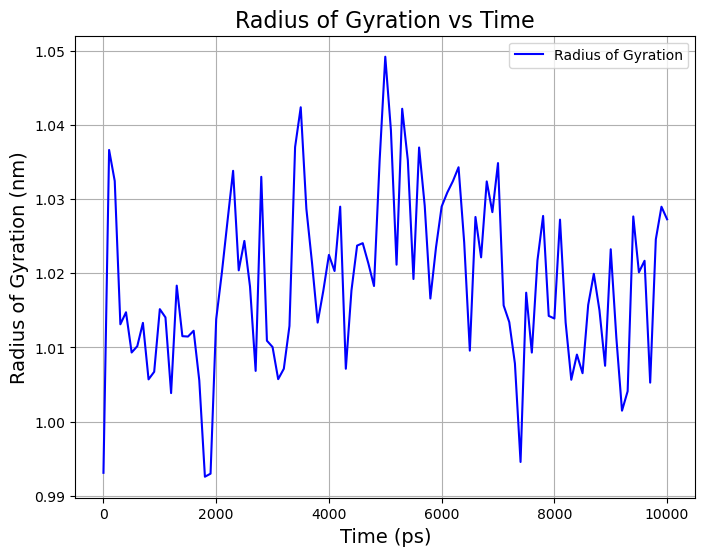

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the data from the polystat.xvg and rgyration.xvg files
polystat_data = np.loadtxt('../Setup/1v1d_gmx_opc/gromacs/polystat.xvg', comments=["@", "#"])
rgyration_data = np.loadtxt('../Setup/1v1d_gmx_opc/gromacs/rgyration.xvg', comments=["@", "#"])

# Extract time, end-to-end distance, and radius of gyration
time = polystat_data[:, 0]  # Time in ps
end_to_end_distance = polystat_data[:, 1]  # End-to-end distance in nm
radius_of_gyration = rgyration_data[:, 1]  # Radius of gyration in nm

# Create the Figures directory if it doesn't exist
if not os.path.exists("../Figures"):
    os.makedirs("../Figures")

# Plot End-to-End Distance vs Time
plt.figure(figsize=(8, 6))
plt.plot(time, end_to_end_distance, label='End-to-End Distance', color='r')
plt.xlabel('Time (ps)', fontsize=14)
plt.ylabel('End-to-End Distance (nm)', fontsize=14)
plt.title('End-to-End Distance vs Time', fontsize=16)
plt.grid(True)
plt.legend()
plt.savefig('../Figures/end_to_end_distance_vs_time.png')
plt.show()

In [ ]:
# Plot Radius of Gyration vs Time
plt.figure(figsize=(8, 6))
plt.plot(time, radius_of_gyration, label='Radius of Gyration', color='b')
plt.xlabel('Time (ps)', fontsize=14)
plt.ylabel('Radius of Gyration (nm)', fontsize=14)
plt.title('Radius of Gyration vs Time', fontsize=16)
plt.grid(True)
plt.legend()
plt.savefig('../Figures/radius_of_gyration_vs_time.png')
plt.show()

## for water ions

In [2]:
# MSD
import MDAnalysis as mda
from MDAnalysis.analysis.msd import EinsteinMSD
import matplotlib.pyplot as plt
import os

# Load the trajectory and topology
u = mda.Universe("../Setup/Wat_NaCl/gromacs/step5_1.gro", "../Setup/Wat_NaCl/gromacs/unwrapped.xtc")

# Select atom groups for Water Oxygens, Sodium, and Oxygen, which is the same 
water_oxygens = u.select_atoms("name OH2")
sodium = u.select_atoms("name SOD")

# Calculate MSD for each atom group
msd_water_oxygen = EinsteinMSD(water_oxygens, select='all', msd_type='xyz').run()
msd_sodium = EinsteinMSD(sodium, select='all', msd_type='xyz').run()

# Create the Figures directory if it doesn't exist
if not os.path.exists("../Figures"):
    os.makedirs("../Figures")


/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:

msd_sodium.results.msds_by_particle

array([[ 2.91038305e-11,  0.00000000e+00,  0.00000000e+00,
        -1.45519152e-11,  1.45519152e-11,  0.00000000e+00,
        -7.27595761e-12],
       [ 1.25715032e+02,  1.62976377e+02,  1.06373015e+02,
         1.40770589e+02,  1.78340092e+02,  1.10552138e+02,
         1.65165974e+02],
       [ 1.68800941e+02,  2.95473908e+02,  1.84096720e+02,
         2.60420456e+02,  3.26699484e+02,  1.56128190e+02,
         2.72185030e+02],
       [ 1.89967640e+02,  4.18248097e+02,  2.61487869e+02,
         4.73275862e+02,  5.64045445e+02,  2.33827023e+02,
         4.43051985e+02],
       [ 2.27331397e+02,  5.69421602e+02,  2.79294502e+02,
         6.85171511e+02,  8.44366716e+02,  2.27526103e+02,
         5.16171654e+02],
       [ 3.05559772e+02,  4.79669196e+02,  4.00532676e+02,
         9.12325311e+02,  1.03634038e+03,  2.19375859e+02,
         6.39870603e+02],
       [ 3.98841451e+02,  4.87897924e+02,  5.75236410e+02,
         9.89196368e+02,  1.45728243e+03,  2.22520266e+02,
         8.4333168

In [3]:
print(msd_water_oxygen.times.shape)
print(msd_water_oxygen.results.timeseries)

(11,)
(11,)


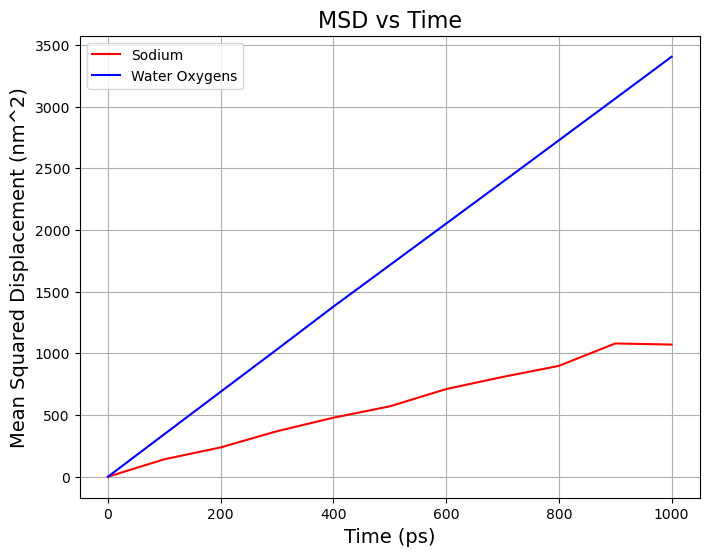

In [12]:
# Plot MSD vs Time for all two groups water oxygen is the same as oxygen for whole system
plt.figure(figsize=(8, 6))

# Plot the MSD for Sodium and Water Oxygens
plt.plot(msd_sodium.times, msd_sodium.results.timeseries, label='Sodium', color='r')
plt.plot(msd_water_oxygen.times, msd_water_oxygen.results.timeseries, label='Water Oxygens', color='b')

# Add labels, title, grid, and legend
plt.xlabel('Time (ps)', fontsize=14)
plt.ylabel('Mean Squared Displacement (nm^2)', fontsize=14)
plt.title('MSD vs Time', fontsize=16)
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig('../Figures/msd_vs_time.png')

# Show the plot (after all the above commands)
plt.show()
